# **Loading Datasets**



In [ ]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from datetime import datetime
%matplotlib inline
#import tensorflow as tf

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train 2.csv to train 2.csv
User uploaded file "train 2.csv" with length 33756294 bytes


In [ ]:
import io
train = pd.read_csv(io.BytesIO(uploaded['train 2.csv']))
train.head()

,Viewers_ID,Joke_identifier,Response_ID,Rating
0,A1,Klint De Drunk Enugu 1,A1_Klint De Drunk Enugu 1,0.11
1,A1,Klint De Drunk Enugu 2,A1_Klint De Drunk Enugu 2,-4.64
2,A1,Klint De Drunk PH 1,A1_Klint De Drunk PH 1,-3.39
3,A1,Klint De Drunk PH 2,A1_Klint De Drunk PH 2,0.44
4,A1,Klint De Drunk Lagos 1,A1_Klint De Drunk Lagos 1,-4.83


In [ ]:
train.head()

,Viewers_ID,Joke_identifier,Response_ID,Rating
0,A1,Klint De Drunk Enugu 1,A1_Klint De Drunk Enugu 1,0.11
1,A1,Klint De Drunk Enugu 2,A1_Klint De Drunk Enugu 2,-4.64
2,A1,Klint De Drunk PH 1,A1_Klint De Drunk PH 1,-3.39
3,A1,Klint De Drunk PH 2,A1_Klint De Drunk PH 2,0.44
4,A1,Klint De Drunk Lagos 1,A1_Klint De Drunk Lagos 1,-4.83


In [ ]:
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
test.head()

,Viewers_ID,Joke_identifier,Response_ID
0,A1,Akpororo Lagos 1,A1_Akpororo Lagos 1
1,A1,Akpororo Abuja 1,A1_Akpororo Abuja 1
2,A1,Akpororo Abuja 5,A1_Akpororo Abuja 5
3,A1,I Go Dye Benin 1,A1_I Go Dye Benin 1
4,A1,I Go Dye Benin 3,A1_I Go Dye Benin 3


# **EDA**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612702 entries, 0 to 612701
Data columns (total 4 columns):
Viewers_ID         612702 non-null object
Joke_identifier    612702 non-null object
Response_ID        612702 non-null object
Rating             612702 non-null float64
dtypes: float64(1), object(3)
memory usage: 18.7+ MB


There is 612,702 training data

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435873 entries, 0 to 435872
Data columns (total 3 columns):
Viewers_ID         435873 non-null object
Joke_identifier    435873 non-null object
Response_ID        435873 non-null object
dtypes: object(3)
memory usage: 10.0+ MB


There is 435,873 testing data

In [ ]:
train_data = train.copy()
train_data.drop(columns = ['Response_ID'], inplace = True)
train_data.head()

,Viewers_ID,Joke_identifier,Rating
0,A1,Klint De Drunk Enugu 1,0.11
1,A1,Klint De Drunk Enugu 2,-4.64
2,A1,Klint De Drunk PH 1,-3.39
3,A1,Klint De Drunk PH 2,0.44
4,A1,Klint De Drunk Lagos 1,-4.83


In [ ]:
test_data = test.copy()
test_data.drop(columns = ['Response_ID'], inplace = True)
test_data.head()

,Viewers_ID,Joke_identifier
0,A1,Akpororo Lagos 1
1,A1,Akpororo Abuja 1
2,A1,Akpororo Abuja 5
3,A1,I Go Dye Benin 1
4,A1,I Go Dye Benin 3


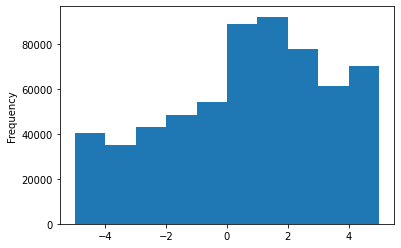

In [ ]:
train_data['Rating'].plot(kind = 'hist')

In [ ]:
train_data.describe()

,Rating
count,612702.000000
mean,0.647024
std,2.667301
min,-5.000000
25%,-1.300000
50%,0.950000
75%,2.690000
max,5.000000


mean  rating is 0.647

# **Model**

Going to use the Surprise package to look for the best performing algorithm to recommend comedyTV movies. The two types are basic algorithms and matrix factorization algorithms.

In [ ]:
pip install surprise

     |████████████████████████████████| 6.5MB 2.2MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1678194 sha256=4bf0704c1f59649590595deb45457c2cc32f8019dc2f5287191c2347cbf1674f
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV

In [ ]:
from surprise import NormalPredictor
from surprise import BaselineOnly
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering

In [ ]:
reader = Reader(line_format = 'user item rating', sep ='\t',rating_scale = (-5,5))

In [ ]:
data = Dataset.load_from_df(train_data, reader)

In [ ]:
# Using several algorithms to find which one works best
'''

benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')  

'''
#Zero division error

"\n\nbenchmark = []\n# Iterate over all algorithms\nfor algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:\n    # Perform cross validation\n    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)\n    \n    # Get results & append algorithm name\n    tmp = pd.DataFrame.from_dict(results).mean(axis=0)\n    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))\n    benchmark.append(tmp)\n    \npd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')  \n\n"

## Train and Predict

###SVD

In [ ]:
#n_factors - k variable in the matrix
model_svd = SVD(n_factors = 75)

In [ ]:
cross_validate(model_svd, data, measures=['RMSE'], cv=3, verbose=True)

Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.2199  2.2116  2.2190  2.2168  0.0037  
Fit time          19.31   19.36   19.38   19.35   0.03    
Test time         2.49    2.14    2.14    2.26    0.17    


{'fit_time': (19.31217122077942, 19.36339545249939, 19.375084161758423),
 'test_rmse': array([2.2199311 , 2.21157013, 2.21900607]),
 'test_time': (2.4926700592041016, 2.1382198333740234, 2.138300657272339)}

Using GridSearchCV for SVD model predictions

In [ ]:
param_grid = {'n_factors':[50, 75], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=2,
                  refit = True, n_jobs = -1,)

gs.fit(data)

In [ ]:
gs.best_params

{'rmse': {'lr_all': 0.005, 'n_factors': 75, 'reg_all': 0.4}}

In [ ]:
gs.best_score

###SVDpp

In [ ]:
model_svdpp = SVDpp(n_factors = 75)

In [ ]:
cross_validate(model_svdpp, data, measures=['RMSE'], cv=3, verbose=True)

Evaluating RMSE of algorithm SVDpp on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.2294  2.2218  2.2211  2.2241  0.0038  
Fit time          279.30  280.57  280.59  280.15  0.60    
Test time         7.53    7.76    7.81    7.70    0.12    


{'fit_time': (279.30177760124207, 280.57044196128845, 280.5864005088806),
 'test_rmse': array([2.22942935, 2.22181218, 2.22106932]),
 'test_time': (7.530069351196289, 7.756072759628296, 7.807297706604004)}

Using GridSearchCV for SVDpp model predictions

---



In [ ]:
param_grid = {'n_factors':[50, 75], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
gs_pp = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=2,
                  refit = True, n_jobs = -1,)

gs_pp.fit(data)

In [ ]:
gs_pp.best_params

In [ ]:
gs_pp.best_score

###NMF

In [ ]:
model_nmf = NMF()

In [ ]:
cross_validate(model_nmf, data, measures=['RMSE'], cv=3, verbose=True)

Using GridSearchCV for NMF model predictions

In [ ]:
param_grid = {'n_factors':[50, 75], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
gs_nmf = GridSearchCV(gs_nmf, param_grid, measures=['rmse'], cv=2,
                  refit = True, n_jobs = -1,)

gs_nmf.fit(data)

In [ ]:
gs_nmf.best_params

In [ ]:
gs_nmf.best_score

###Slope One

In [ ]:
model_so = SlopeOne()

In [ ]:
cross_validate(model_so, data, measures=['RMSE'], cv=3, verbose=True)

Evaluating RMSE of algorithm SlopeOne on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.2460  2.2408  2.2371  2.2413  0.0036  
Fit time          0.74    0.95    0.95    0.88    0.10    
Test time         5.42    4.90    5.49    5.27    0.27    


{'fit_time': (0.7353384494781494, 0.9491579532623291, 0.9514904022216797),
 'test_rmse': array([2.24596197, 2.24079546, 2.23711935]),
 'test_time': (5.421247243881226, 4.8964269161224365, 5.491454601287842)}

Using GridSearchCV for SlopeOne model predictions



In [ ]:
param_grid = {'n_factors':[50, 75], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
gs_so = GridSearchCV(gs_so, param_grid, measures=['rmse'], cv=2,
                  refit = True, n_jobs = -1,)

gs_so.fit(data)

In [ ]:
NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore()

###Normal Predictor

In [ ]:
model_np = NormalPredictor()

In [ ]:
cross_validate(model_np, data, measures=['RMSE'], cv=3, verbose=True)

Evaluating RMSE of algorithm NormalPredictor on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    3.6552  3.6633  3.6567  3.6584  0.0035  
Fit time          0.60    0.82    0.84    0.75    0.11    
Test time         2.04    1.99    2.02    2.01    0.02    


{'fit_time': (0.600658655166626, 0.8222525119781494, 0.8405306339263916),
 'test_rmse': array([3.65520841, 3.66326023, 3.65670356]),
 'test_time': (2.0371124744415283, 1.9856476783752441, 2.0204885005950928)}

###BaseLine

In [ ]:
model_bl = BaselineOnly(bsl_options={'method': 'sgd',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
)

In [ ]:
cross_validate(model_bl, data, measures=['RMSE'], cv=3, verbose=True)

Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Evaluating RMSE of algorithm BaselineOnly on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.3205  2.3150  2.3172  2.3176  0.0023  
Fit time          0.82    1.03    1.03    0.96    0.10    
Test time         1.77    1.72    1.74    1.74    0.02    


{'fit_time': (0.8180804252624512, 1.0325467586517334, 1.02768874168396),
 'test_rmse': array([2.3204868 , 2.31499518, 2.31718471]),
 'test_time': (1.7687129974365234, 1.7227182388305664, 1.7391610145568848)}

In [ ]:
uid = 'A1'
iid =	'Akpororo Lagos 1'

In [ ]:
gs.predict(uid,iid)

#Submission file

Predicting ratings of the test file

In [ ]:
array = []
# Using algo xx to predict
for index, row in test_data.iterrows():
    rating = model_svdpp.predict(row.Viewers_ID, row.Joke_identifier)
    array.append(rating.est)

In [ ]:
test_data['Rating'] = pd.DataFrame(data = array, columns = ["Ratings"])

In [ ]:
test_data.head()

,Viewers_ID,Joke_identifier,Rating
0,A1,Akpororo Lagos 1,4.539040
1,A1,Akpororo Abuja 1,1.932163
2,A1,Akpororo Abuja 5,0.769273
3,A1,I Go Dye Benin 1,2.758095
4,A1,I Go Dye Benin 3,0.924639


In [ ]:
test['Rating'] = test_data['Rating']

In [ ]:
test.head()

,Viewers_ID,Joke_identifier,Response_ID,Rating
0,A1,Akpororo Lagos 1,A1_Akpororo Lagos 1,4.539040
1,A1,Akpororo Abuja 1,A1_Akpororo Abuja 1,1.932163
2,A1,Akpororo Abuja 5,A1_Akpororo Abuja 5,0.769273
3,A1,I Go Dye Benin 1,A1_I Go Dye Benin 1,2.758095
4,A1,I Go Dye Benin 3,A1_I Go Dye Benin 3,0.924639


In [ ]:
test[['Response_ID', 'Rating']].to_csv('result.csv', sep=',', index = False)

In [ ]:
from google.colab import files
files.download("result.csv")

In [ ]:
#Check raw and inner ids in the Surprise documentation
user = 'A1'	
jokeid = 'Klint De Drunk Enugu 2'

In [ ]:
#predicting for a certain user and jokeid
model.predict(train_data.Viewers_ID.apply(get_Ui),train_data.Joke_identifier.apply(get_Iu))